# Google Trends for LaTeX One Pagers

In [20]:
#Setup and Import Required Libraries
from pytrends.request import TrendReq

import time
import numpy as np

import pandas as pd
# plot the data 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

import datetime
now = datetime.datetime.now()
currentyear = now.year

headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Sec-Fetch-Site': 'same-origin',
    'Cookie': 'SIDCC=ACA-OxOnJOC7DS5KiRxIT_fR2QkEWCcC0qnRq2CsEQsF4Sys_RO_vNC35Crs2MB5YdXFgAsV; __Secure-1PSIDCC=ACA-OxP0ptWglmVe-8Y9UjZEA2PjryZYF9U8Da7mYl3v3-UARlu_SF6igP2ExrnNjJIq3n_0; __Secure-3PSIDCC=ACA-OxNgjKevY3Zow3HLaWD6avR6m0Vw9brDKI_2YZ1HqqVhrksBkErpBGhNVcwjaR90uCTacQ; __Secure-1PSIDTS=sidts-CjIBNiGH7jHN0DIAoxvWfLffElvkiz4xuHvf4HlXznYgJbCKXTpI1Vd7cNt473ct6lIW0RAA; __Secure-3PSIDTS=sidts-CjIBNiGH7jHN0DIAoxvWfLffElvkiz4xuHvf4HlXznYgJbCKXTpI1Vd7cNt473ct6lIW0RAA; OTZ=7313007_52_52_123900_48_436380; APISID=rGw9b4LlhUzdu9JK/A5FCfs42fPt9ML6c_; HSID=AyERsaCQdeoOCSTaz; NID=511=X8aF5DKahzhIfJnmosQ1ObPEG8zuH2izcRIKsuqYeEylpV2ZHP3pSelOtraRPMq4pgy2wjm7kxo6c7lmnqSxHev6GySI8oINAQB_awzDtax9YDqHEShrtK_WLysYWiVDRMvy_LrNkEmF8G2N13timw27rWOVsasND3EDY4hkYo3oliLUp5CZL3xjGC_M2hz2JvuR5I-ICNWpO32rj4F_ocrG43zfkegl5cJHGT2MCiSUriZCbxP1kaMBPQTG-_Y4JTRakj4E; SAPISID=xtm7yO5yqBMIfMO_/AraNHIFdvZpGK-nKQ; SID=dQitCu_1-9kn51deqjTS85Cx8dHgq3zcTMHZonuWCvwC6Ty3PQihDzktg1v-0nRdHwAujA.; SSID=Agfst-sFEI8JQacAA; __Secure-1PAPISID=xtm7yO5yqBMIfMO_/AraNHIFdvZpGK-nKQ; __Secure-1PSID=dQitCu_1-9kn51deqjTS85Cx8dHgq3zcTMHZonuWCvwC6Ty3nqCQMxgz8872_h16xzPhcA.; __Secure-3PAPISID=xtm7yO5yqBMIfMO_/AraNHIFdvZpGK-nKQ; __Secure-3PSID=dQitCu_1-9kn51deqjTS85Cx8dHgq3zcTMHZonuWCvwC6Ty3BncuJgujlOIb3nvCSH52zQ.',
    'Sec-Fetch-Dest': 'document',
    'Accept-Language': 'en-gb',
    'Sec-Fetch-Mode': 'navigate',
    'Host': 'trends.google.com',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.6 Safari/605.1.15',
    'Referer': 'https://trends.google.com/',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}



# lets build a function to get the data for a list of keywords
def get_trend_data(keyword):
    time.sleep(1)
    pytrends = TrendReq(hl='en-US', tz=360, retries=3, backoff_factor=0.1, requests_args={"headers": headers}) 
    timeframe = f'2004-01-01 {currentyear}-12-31' # time frame for data

    try:
        pytrends.build_payload([keyword], cat=0, timeframe=timeframe)
        data = pytrends.interest_over_time()
        data['smooth'] = data[keyword].rolling(window=30).mean()
        return data
    except:
        time.sleep(1)
        return np.nan, np.nan


In [28]:

plt.rcParams.update({'font.size': 20})

def export_plot(keyword, year):
    data = get_trend_data(keyword)

    # Create a figure and a single subplot
    fig, ax = plt.subplots()

    # Plot the data
    ax.plot(data.index, data["smooth"], color='black')

    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Remove the y axis
    ax.yaxis.set_visible(False)

    # Set the background color to transparent
    fig.patch.set_alpha(0.0)
    ax.patch.set_alpha(0.0)

    # Calculate the midpoint date of the year
    midpoint = datetime.datetime(year, 1, 1) + (datetime.datetime(year+1, 1, 1) - datetime.datetime(year, 1, 1)) / 2

    # Mark the start of the year with a vertical line
    ax.axvline(midpoint, color='black', linestyle='--')

    # Only show the years on the x axis
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(MaxNLocator(nbins='auto', integer=True))

    # Make the year bold
    labels = ax.get_xticklabels()
    for label in labels:
        if label.get_text() == str(year):
            label.set_weight('bold')
    # Set the title
    ax.set_title(f'Google Trends', color='black')

    # Create a filename by combining the keyword and year
    filename = f'{keyword}_{year}.png'

    # Save the plot as a PDF
    plt.savefig(filename, format='png')


/Users/jonas/Documents/Wein/Factsheet-Automation/Scraping/.conda/lib/python3.9/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


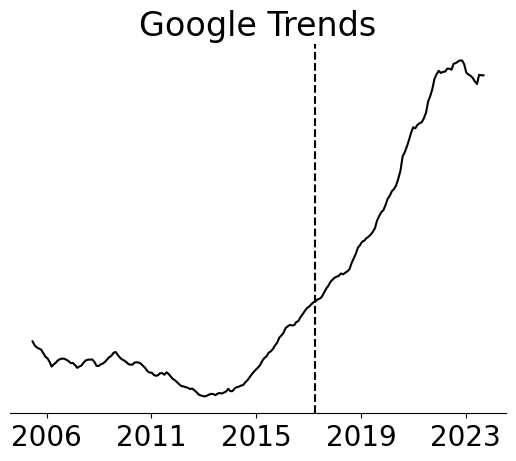

In [29]:
# example for the keyword "Primitivo" and the year 2017
export_plot('Primitivo', 2017)

# Weather Data
meteostat vs open-meteo

In [6]:
#!conda env export > environment.yml
#!pip freeze | grep -v "^-e" | grep -v "@" | awk -F= '{print $1 "==" $3}' > requirements.txt

In [62]:
import numpy as np 
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 

from datetime import datetime
from meteostat import  Daily, Stations


In [63]:
# function to find the coordinate of a given city  
def findGeocode(city): 
       
    # try and catch is used to overcome the exception thrown by geolocator 
    try:  
        geolocator = Nominatim(user_agent="your_app_name") 
          
        return geolocator.geocode(city, language='en') 
      
    except GeocoderTimedOut: 
          
        return findGeocode(city)     


In [64]:
# make def to return latitude and longitude for a city given a country (more reliable because sometimes the same city name exists in different countries)
def get_lat_long(city, country):
    if findGeocode(city) != None: 
        if findGeocode(city).raw["display_name"].split(", ")[-1] == country:
            return findGeocode(city).latitude, findGeocode(city).longitude
        #return findGeocode(city).latitude, findGeocode(city).longitude
        else:
            # open csv file and append the data city to clean it later
            with open('log.csv', 'a') as f:
                # format: City: "city", Country: "country", Date: "date" (only date, not time)
                f.write("City: " + city + ", Country: " + country + ", Date: " +str(datetime.today().strftime('%d-%m-%Y')) + '\n')
            return np.nan, np.nan
    else:
        # open csv file and append the data city to clean it later
        with open('log.csv', 'a') as f:
            # format: City: "city", Country: "country", Date: "date" (only date, not time)
            f.write("City: " + city + ", Country: " + country + ", Date: " +str(datetime.today().strftime('%d-%m-%Y')) + '\n')
        return np.nan, np.nan

In [65]:
# average a df per column based on a multiindex if its non empty
def average_df(df):
    if not df.empty:
        df = df.groupby(level=1).mean()
    return df

# make def to get data based on a city and year from the n nearest stations
def get_weather(city, country, year, n):
    start = datetime(int(year), 1, 1)
    end = datetime(int(year), 12, 31)

    lat, lon = get_lat_long(city,country)
        # check if not nan
    if np.isnan(lat) or np.isnan(lon):
        # break if nan
        return np.nan
    else:
        stations = Stations()
        stations = stations.nearby(lat, lon)
        station = stations.fetch(n)
        data = Daily(station, start, end)
        data = data.fetch()
        return average_df(data)

### Reduce to growth period

In [66]:
get_weather('Napa', 'United States', 2019, 5)

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2019-01-01,8.040000,0.620000,14.860,0.0,NaN,356.0,14.880000,NaN,1022.966667,NaN
2019-01-02,4.040000,-2.260000,12.820,0.0,NaN,121.0,4.320000,NaN,1024.533333,NaN
2019-01-03,5.400000,-1.633333,12.700,0.0,NaN,20.0,6.250000,NaN,1023.100000,NaN
2019-01-04,5.560000,0.860000,13.120,0.0,NaN,156.0,6.100000,NaN,1016.000000,NaN
2019-01-05,8.340000,4.380000,12.000,NaN,NaN,142.5,13.575000,NaN,1008.600000,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,6.540000,-0.260000,16.220,0.0,NaN,308.0,6.025000,NaN,1017.766667,NaN
2019-12-28,6.225000,-0.800000,14.725,0.0,NaN,121.0,2.075000,NaN,1020.400000,NaN
2019-12-29,8.333333,5.133333,11.600,14.8,NaN,87.0,7.466667,NaN,1019.600000,NaN


In [67]:
# get df for certain time frame based on index
def get_growth_period(df, start, end):
    return df.loc[start:end]
#Growth period: may 11th - september 20th 
#https://en.wikipedia.org/wiki/Harvest_(wine)
#df = get_growth_period(df, '2019-03-11', '2019-09-20')

### get volatility

In [68]:
# get volatility of a single column
def get_volatility(df, column):
    return df[column].std()/df[column].mean()


### Longest drought

In [69]:
# get the longest consecutive sequence of a value in a df
def longest_sequence(df, column, value):
    return df[column].eq(value).astype(int).groupby(df[column].ne(value).cumsum()).sum().max()


### Longest rain period

In [70]:
# get the longest consecutive sequence of the absence (!) of a value in a df
# this is the longest sequence of days with rain
def longest_sequence_no(df, column, value):
    return df[column].ne(value).astype(int).groupby(df[column].eq(value).cumsum()).sum().max()

### Avg Rain

In [71]:
#Vines need between 400 and 600 mm of rain per year. 
#A regular supply of water throughout the growth cycle is needed for a high quality crop.
#https://www.idealwine.info/conditions-necessary-great-wine-part-12/
# get the avg of the column prcp for a df
def get_avg_prcp(df):
    return df['prcp'].mean()

### No of Days above 35 degrees 

In [72]:
#At temperatures below 10°C and above 35°C, photosynthesis will be disrupted and vines will not grow properly.
# count number of rows in a df column tmax above a threshold
def count_above(df, column, threshold):
    return df[df[column] > threshold][column].count()

### number of days below 10 degrees


In [73]:
# count number of rows in a df column tmax under a threshold

def count_under(df, column, threshold):
    return df[df[column] < threshold][column].count()

### coulure wspd

In [74]:
#strong wind around june --> coulure 
# get the avg of the column wspd for a df
def get_avg_wspd(df):
    year = df.index[0].year
    df = get_growth_period(df, f'{year}-05-15', f'{year}-07-15')
    return df['wspd'].mean()

### May July Rain

In [75]:
#Too much rain during the May-July period --> diseases such as mildew or oidium
# sum the column prcp for a df
def get_sum_prcp(df):
     year = df.index[0].year
     df = get_growth_period(df, f'{year}-05-15', f'{year}-07-15')
     return df['prcp'].sum()

## Combined Features
```
Temp Vola: get_volatility(df, 'tavg')
Rain Vola: get_volatility(df, 'prcp')
Longest drought: longest_sequence(df, 'prcp', 0)
Longest Rain: longest_sequence_no(df, 'prcp', 0) 
Avg Rain: get_avg_prcp(df)
NoDays35: count_above(df, 'tmax', 35)
NoDays10: count_under(df, 'tmin', 10)
NoDays0: count_under(df, 'tmin', 0)
ColourWspd: get_avg_wspd(df)
MayJulyRain: get_sum_prcp(df)
```

In [97]:
# combine all function in one function

def get_weather_features(city, country, year, n):
    raw = get_weather(city, country, year, n)
    if raw is np.nan:
        return pd.Series([np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])
    else:
        df = get_growth_period(raw, f'{year}-03-11', f'{year}-09-20')
        return pd.Series([get_volatility(df, 'tavg'), get_volatility(df, 'prcp'), longest_sequence(df, 'prcp', 0), longest_sequence_no(df, 'prcp', 0), get_avg_prcp(df), count_above(df, 'tmax', 35), count_under(df, 'tmin', 10), count_under(df, 'tmin', 0), get_avg_wspd(df), get_sum_prcp(df)])

#### Example:

In [77]:
get_weather_features('Napa','United States', 2019, 5)
#Vola_Temp, Vola_Rain, Longest_Dry, Longest_Wet, Avg_Rain, Count_above35, Count_under10, Count_under0, Coulure_Wind, June_Rain = get_weather_features('Bordeaux','France', 2019, 5)


(0.21985330859786992,
 6.959674107894382,
 58,
 4,
 0.3157303370786517,
 11,
 52,
 0,
 15.071129032258066,
 30.7)

# Merge

In [83]:
import pandas as pd
# load drafts/df_out.csv
df = pd.read_csv('wine_data.csv')

In [84]:
df

,Vintage,Score,Drink Window,Description,Country,Region,Variety
0,2021,93–97,NYR,As vines struggled to ripen their fruit at the...,United States,Napa,Cabernet
1,2020,87,Drink,The setup—wet winter into dry spring—was ideal...,United States,Napa,Cabernet
2,2019,97,Hold,A wet spring resulted in less overt tannic str...,United States,Napa,Cabernet
3,2018,99,Hold,A wet winter provided sufficient water through...,United States,Napa,Cabernet
4,2017,92,Drink or hold,"Drought broke over the winter, with lots of ve...",United States,Napa,Cabernet
...,...,...,...,...,...,...,...
1427,2010,91,Drink or hold,"Warm, dry growing season at both ends of the v...",France,Loire,Sauvignon Blanc
1428,2009,92,Drink or hold,"Warm, consistent growing season that benefited...",France,Loire,Sauvignon Blanc
1429,2007,84,Past peak,Inconsistent growing season marked by a cool s...,France,Loire,Sauvignon Blanc
1430,2006,85,Past peak,"Rainy season caused some rot problems, though ...",France,Loire,Sauvignon Blanc


## Weather

In [85]:
# unique country + region tuples
unique = df[['Country', 'Region']].drop_duplicates()
unique

,Country,Region
0,United States,Napa
31,United States,Carneros
57,United States,California
83,United States,Oregon
107,United States,Washington
152,Argentina,Mendoza
197,Australia,Barossa and McLaren Vale
219,Australia,Victoria
259,Austria,Austria
317,Chile,Chile


In [117]:
# regions to clean
get_lat_long('Coimbra', 'Portugal')

(40.2111931, -8.4294632)

Carneros, United States -> Carneros Valley

Barossa and McLaren Vale, Australia --> Adelaide

Médoc, Pessac-Léognan, France -> Médoc

Pomerol, St.-Emilion, France -> Saint-Émilion
 
Côtes de Nuits, France -> Vougeot

Riesling, Germany -> Rheingau (Rieslin nur Variety)

Tuscany, Bolgheri, Maremma, Italy -> Bolgheri

Tuscany, Brunello di Montalcino, Italy -> Brunello di Montalcino

Douro Valley, Portugal --> Coimbra

In [98]:
unique[["Vola_Temp", "Vola_Rain", "Longest_Dry", "Longest_Wet", "Avg_Rain", "Count_above35", "Count_under10", "Count_under0", "Coulure_Wind", "June_Rain"]] = unique.apply(lambda row: get_weather_features(row['Region'], row['Country'], 2020, 5), axis=1)
unique

,Country,Region,Vola_Temp,Vola_Rain,Longest_Dry,Longest_Wet,Avg_Rain,Count_above35,Count_under10,Count_under0,Coulure_Wind,June_Rain
0,United States,Napa,0.251216,12.225392,73.0,3.0,0.027841,17.0,57.0,1.0,15.233226,4.50
31,United States,Carneros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,United States,California,0.281211,4.734618,125.0,7.0,0.323625,83.0,44.0,0.0,11.802097,1.55
83,United States,Oregon,0.487574,3.535003,57.0,5.0,0.434021,8.0,165.0,42.0,11.283871,42.60
107,United States,Washington,0.341665,2.433605,7.0,6.0,4.473711,4.0,60.0,0.0,11.601075,183.10
152,Argentina,Mendoza,0.453380,1.921515,1.0,15.0,3.153788,0.0,159.0,41.0,9.341667,82.50
197,Australia,Barossa and McLaren Vale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,Australia,Victoria,NaN,2.821435,9.0,53.0,1.751804,0.0,163.0,15.0,NaN,98.48
259,Austria,Austria,0.413291,1.830618,11.0,14.0,4.210000,0.0,131.0,15.0,10.613710,286.75
317,Chile,Chile,0.123744,NaN,0.0,57.0,NaN,0.0,13.0,0.0,8.166667,0.00
